In [ ]:
#  A churn model to predict customers who where going to leave
# we will do some analysis before buliding a classification model
# we will look at some feature importance plot 

In [1]:
# lets import our dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xgboost as xgb
from sklearn.metrics import confusion_matrix

In [2]:
# make sure our plots appear on the jupyter notebook
%matplotlib inline

In [3]:
# lets get our data
Customer_data = pd.read_csv('Churn_Modelling.csv')

In [4]:
# lets veiw the first five few rows
Customer_data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# lets get some more info about the rows and column
# 10000 entries and no missing values
Customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
# a good visualisation library
import seaborn as sns

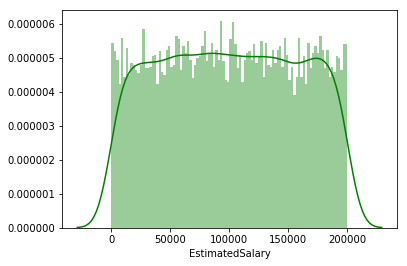

In [8]:
# lets visualise the distribution of income/salary of applicants
sns.distplot(Customer_data['EstimatedSalary'],color='green',bins=100)
# fairly uniformly distributed, questionable and how come some salary of 0 
# We will analysis more later

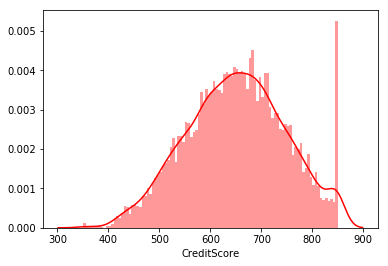

In [9]:
# lets visualise the distribution of credit score of applicants
sns.distplot(Customer_data['CreditScore'],color='red',bins=100)
# That looks like a normal distribution


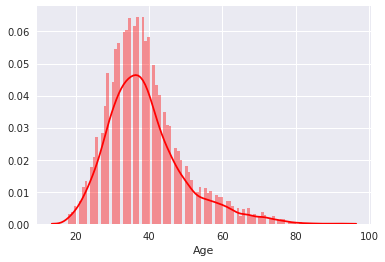

In [11]:
# lets visualise the distribution of age of applicants
sns.distplot(Customer_data['Age'],color='red',bins=100)
# That looks like a normal distribution

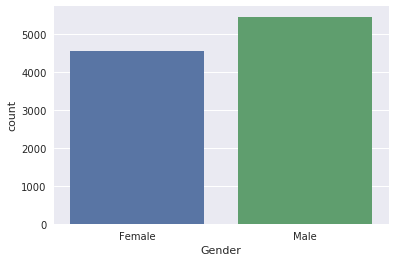

In [10]:
# Lets visualise the gender distribution
sns.set(style="darkgrid")
ax = sns.countplot(x="Gender", data=Customer_data)

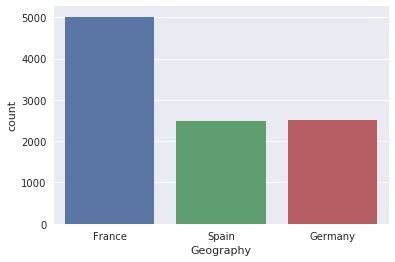

In [13]:
# Lets visualise the gender distribution
sns.set(style="darkgrid")
ax = sns.countplot(x="Geography", data=Customer_data)

In [16]:
# lets do some analysis
# Home many people have credit score above 650 and have exited


Customer_data[Customer_data['CreditScore'] >= 650].count()


RowNumber          5100
CustomerId         5100
Surname            5100
CreditScore        5100
Geography          5100
Gender             5100
Age                5100
Tenure             5100
Balance            5100
NumOfProducts      5100
HasCrCard          5100
IsActiveMember     5100
EstimatedSalary    5100
Exited             5100
dtype: int64

In [17]:
# lets do some analysis
# Home many people have credit score above 650 
# and have an estimated salary of 0
Customer_data[(Customer_data['CreditScore'] >= 650) & (Customer_data['EstimatedSalary'] == 0)].count()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [19]:
# Home many people have credit score above 650 and have exited
Customer_data[(Customer_data['CreditScore'] >= 650) & (Customer_data['Exited'] == 1)].count()
# Very small number given that our dataset is 10000 i.e less than 10%

RowNumber          988
CustomerId         988
Surname            988
CreditScore        988
Geography          988
Gender             988
Age                988
Tenure             988
Balance            988
NumOfProducts      988
HasCrCard          988
IsActiveMember     988
EstimatedSalary    988
Exited             988
dtype: int64

In [20]:
# lets build our model now
# we will preprocess data first before building model
# Our target variable Y is exited
# Our dependent variable is X
# During data processing we will drop the first three rows RowNumber,
# CustomerId, #Surname because they are unlikely to help.
# lets preprocess our data

In [22]:
# lets identify our variables by using iloc to slice out the rows we need
# for our model and convert them to numpy arrars
X = Customer_data.iloc[:, 3:13].values
y = Customer_data.iloc[:, 13].values

In [23]:
# we still have some categorical data, models in ML don't are not very
# keen on looking at categorical data, we will convert into ML readable 
# lanquage.

In [24]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:]

In [25]:
# Splitting the dataset into the Training set and Test set
# Can use cross validation here instead of train test split 
# which is more accurate but computational expensive
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [26]:
# Feature Scaling
# we need to scale and transform our data to have similar scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [35]:
model = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05).fit(X_train, y_train)

In [37]:
Y_pred = model.predict(X_test)

/home/alex/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [39]:
# Lets evaluate our model
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, Y_pred)

array([[1524,   71],
       [ 196,  209]])

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
# not too bad baut some feature creation can make model better
accuracy_score(y_test, Y_pred)

0.8665